###### importing all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#Problem Statement

###### Importing the Datset

In [2]:
df=pd.read_csv("C:/Users/asus/Downloads/car_data.csv")

Data Analysis & EDA 

In [3]:
#checking top 5 row of DataFrame
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#checking dimensioal of DataFrame
df.ndim

2

In [5]:
#checking no. of rows and columns in DataFrame
df.shape

(4340, 8)

In [7]:
#check the columns name dataframe 
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
#Show all the statistical data of the DataFrame
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [9]:
#how many unique value in fuel column
df['fuel'].nunique()

5

In [10]:
# checking unique value in fuel column
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [11]:
## checking unique value in seller_type column
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [12]:
## checking unique value in transmission column
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
## checking unique value in owner column
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [14]:
new_df=df.copy()

In [15]:
#create a column new_fuel and place it at index of fuel column
#Replace the value:
#petrol -0
#Diesel -1
#CNG -2
#LPG -3
#Electric -4
new_df['fuel']=new_df['fuel'].astype('string')
new_fuel=[]
for i in new_df.fuel:
    if i=='Petrol':
        new_fuel.append(0)
    elif i=='Diesel':
        new_fuel.append(1)
    elif i=='CNG':
        new_fuel.append(2)
    elif i=='LPG':
        new_fuel.append(3)
    else:
        new_fuel.append(4)
#second option
#x=new_df.fuel.replace({'Petrol':0,"Diesel":1,"CNG":2,"LPG":3,"Electric":4})

In [16]:
len(new_fuel)

4340

In [19]:
#insert the new_fuel columns
df.insert(df.columns.get_loc('fuel'),"new_fuel",new_fuel)

In [20]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,Individual,Manual,Second Owner


In [21]:
# checking unique value in new_fuel column
df.new_fuel.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [22]:
#create a column new_seller and place it at index of seller_type column
#Replace the value:
#Individual -0
#Dealer -1
#Trustmark Dealer-2

x=df.seller_type.replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
df.insert(df.columns.get_loc('seller_type'),"new_seller_type",x)

C:\Users\asus\AppData\Local\Temp\ipykernel_17552\1228642667.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x=df.seller_type.replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})


In [23]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


In [24]:
# checking unique value in new_seller column
df.new_seller_type.unique()

array([0, 1, 2], dtype=int64)

In [25]:
#checking the name of columns
new_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'new_fuel', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [26]:
#crate new DataFrame with two columns name      
new_df=new_df[["fuel","seller_type"]]

In [27]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


Label encoder to encode the categorical data into integer value

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
new_df['fuel']=LabelEncoder().fit_transform(new_df['fuel'])

In [31]:
# numeric value assigned according to alphabetical 
#Assigment of value 
#CNG -0
#Diesel -1
#Eletric - 2
#LPG -3
#Petrol -4
new_df.head(10)

,fuel,seller_type
0,4,Individual
1,4,Individual
2,1,Individual
3,4,Individual
4,1,Individual
5,4,Individual
6,4,Individual
7,4,Individual
8,4,Individual
9,0,Individual


using 'one hot encoder' to encode the categorical data into integer value

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
#its not work
#var=ColumnTransformer(transformers=
#[('encoder',OneHotEncoder(),new_df['seller_type'])])

In [21]:
enc=OneHotEncoder(handle_unknown='ignore')
enc.fit(new_df)

OneHotEncoder(handle_unknown='ignore')

In [43]:
enc_df=pd.DataFrame(enc.fit_transform(new_df[['seller_type']]).toarray())

In [44]:
# 'seller_type'->['Individual', 'Dealer', 'Trustmark Dealer']
#First column -Individual
#second column - Dealer
#third column - Trustmark Dealer
enc_df.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


You  also do it with pandas inbuilt function to doing 'one hot encodering'

In [46]:
new_df=df.copy()

In [47]:
new_df=new_df[["fuel","seller_type"]]

In [49]:
new_df.head()

,fuel,seller_type
0,Petrol,Individual
1,Petrol,Individual
2,Diesel,Individual
3,Petrol,Individual
4,Diesel,Individual


In [50]:
new_df=pd.get_dummies(new_df)

In [52]:
new_df.head()

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,False,False,False,False,True,False,True,False
1,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,True,False
3,False,False,False,False,True,False,True,False
4,False,True,False,False,False,False,True,False


### performing LabelEncoder in dataframe 

In [25]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [26]:
df['fuel']=LabelEncoder().fit_transform(df['fuel'])
df['seller_type']=LabelEncoder().fit_transform(df['seller_type'])
df['transmission']=LabelEncoder().fit_transform(df['transmission'])
df['owner']=LabelEncoder().fit_transform(df['owner'])

In [27]:
#all the categorical value column(fuel	seller_type	transmission	owner) 
#will be change in integer
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [41]:
#create a column no_of_years =current year - year  #currect year=2024
# no_of_year=[]
# current_year=2024
# for i in df.year:
#     diff=current_year-i
#     no_of_year.append(diff)
#df.insert(df.columns.get_loc('year'),"no_of_year",no_of_year)

df['current_year']=2024
df['no_of_year']=df['current_year']-df['year']
    

In [42]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_year
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2024,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2024,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2024,12
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2024,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2024,10


In [49]:
#Drop columns -name,year,current_year
#rename selling_price to current_selling_price
df.drop(['name','year','current_year'],axis=1,inplace=True)

In [47]:
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [50]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_year
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int32
 3   seller_type            4340 non-null   int32
 4   transmission           4340 non-null   int32
 5   owner                  4340 non-null   int32
 6   no_of_year             4340 non-null   int64
dtypes: int32(4), int64(3)
memory usage: 169.7 KB


In [52]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_year
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_year,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


<Axes: >

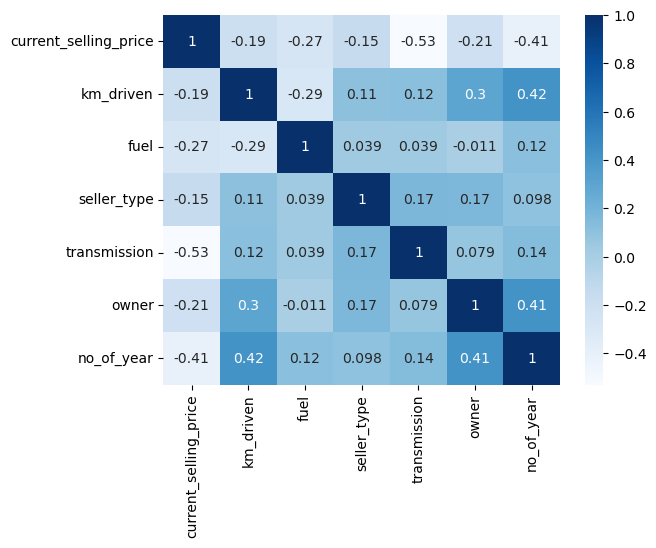

In [53]:
sns.heatmap(data=df.corr(),annot=True,cmap='Blues')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

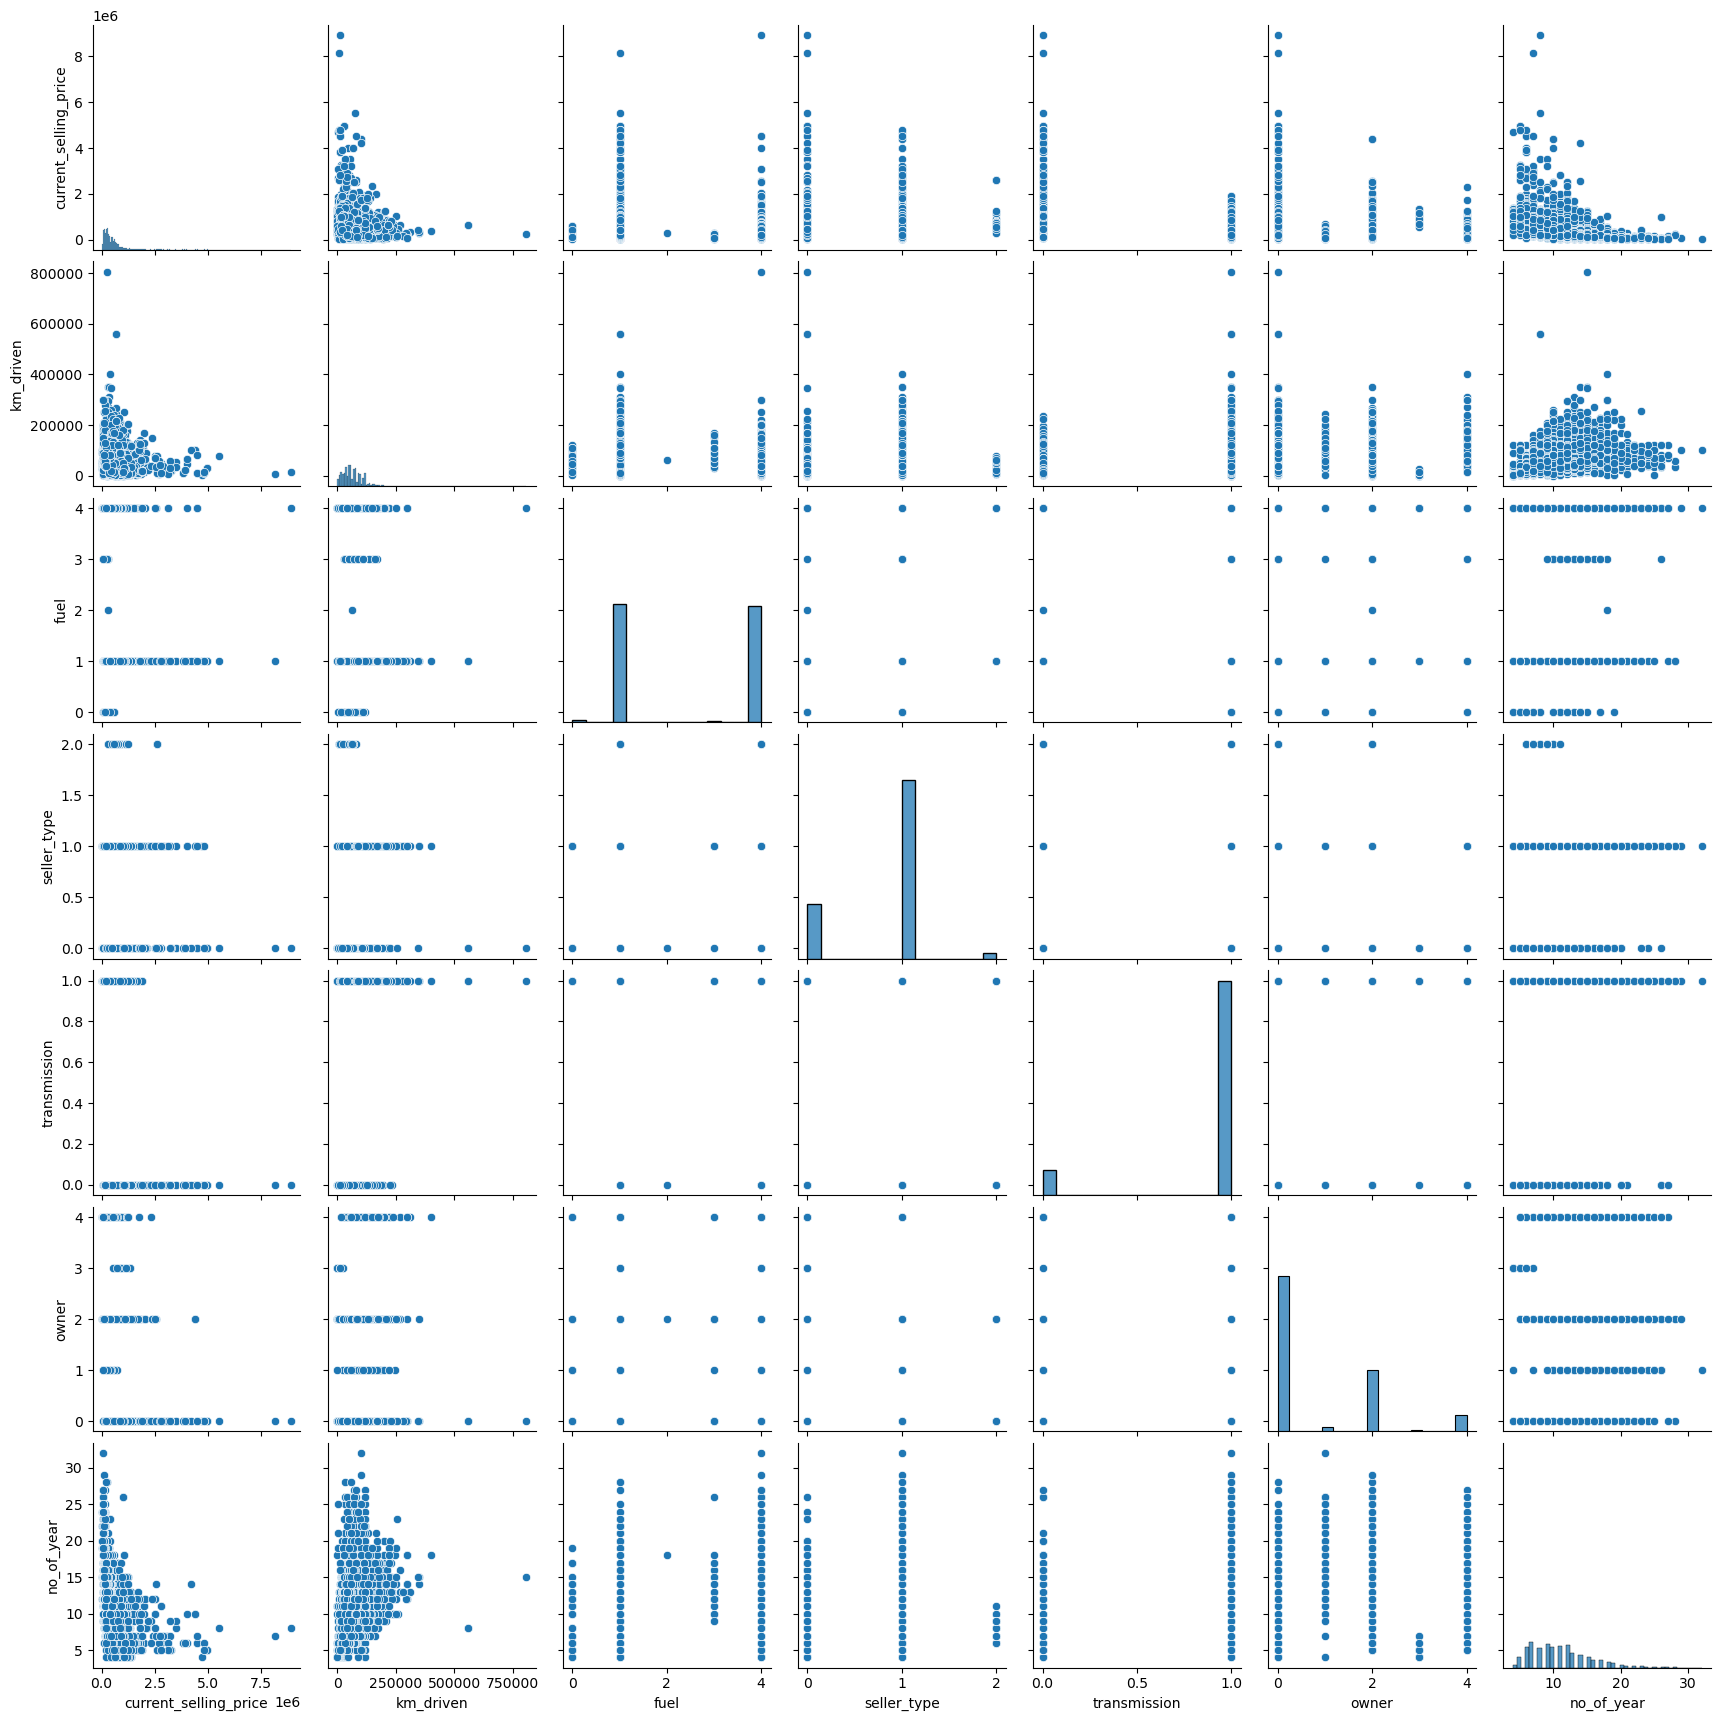

In [54]:
sns.pairplot(df)

<Axes: >

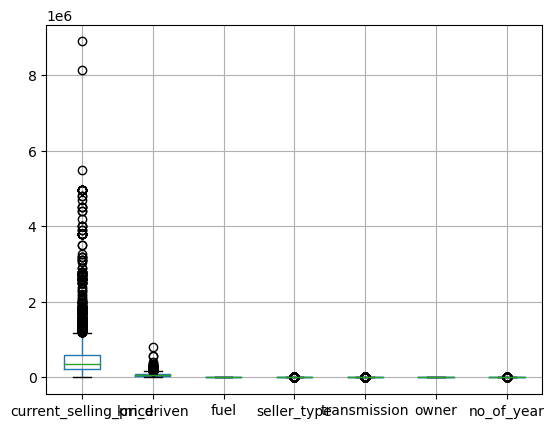

In [55]:
df.boxplot()

# machine Learning

select the features and targets

In [60]:
x=df.iloc[:,1:].values
y=df.iloc[:,:1].values

#Feature selection
#Feature scaling -->optional

splitting the data

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [65]:
len(y_train)

3472

#choosing the model 

In [66]:
regressor=DecisionTreeRegressor()

Training the model

In [ ]:
#Hyper Parameter tuning
#abcd=[x for i in np.linspace(100,1200,12)]

In [ ]:
# param={
#     'ccp_alpha'=abcd
# }

In [68]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

Testing the model

In [90]:
y_test=y_test.reshape(-1)

In [70]:
y_pred=regressor.predict(x_test)

In [88]:
y_pred = y_pred.reshape(-1)  

In [91]:
y_test.shape

(868,)

In [92]:
target=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [94]:
target.head()

,Actual,Predicted
0,396000,625000.0
1,240000,195000.0
2,800000,934000.0
3,465000,500000.0
4,550000,550000.0


Text(0.5, 1.0, 'Actual V/s Predict')

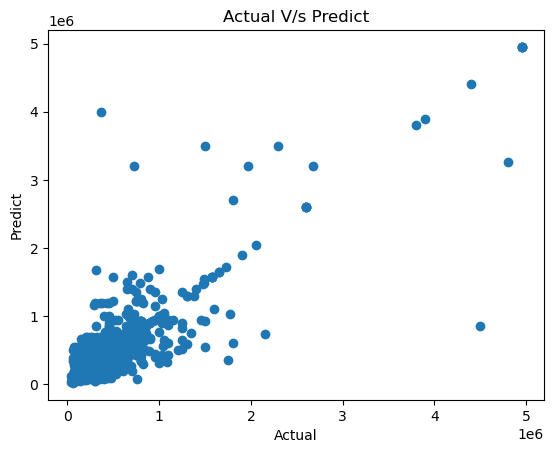

In [95]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title("Actual V/s Predict")

In [99]:
x_test.shape

(868, 6)

In [100]:
# plt.scatter(x_test,y_test,color='red')
# plt.scatter(x_test,y_pred,color='green')

performance

In [102]:
r2_score(y_test,y_pred)

0.6670478608741077

<Axes: >

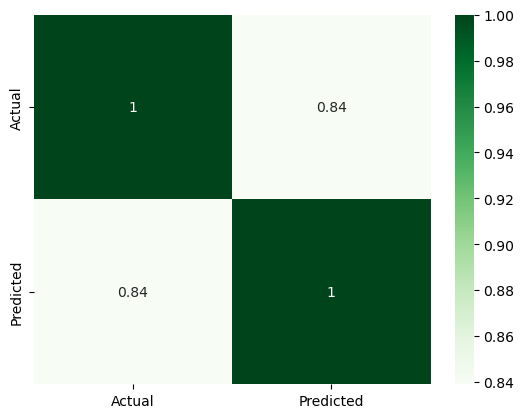

In [104]:
#the annot=True parameter is used to display the actual data values on each cell in the heatmap.
sns.heatmap(data=target.corr(),annot=True,cmap="Greens")

In [106]:
mean_squared_error(y_test,y_pred)

105670548979.60225

In [107]:
mean_absolute_error(y_test,y_pred)

162583.9154558255